In [48]:
###

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# load data
data = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [51]:
# Display the first few rows of the dataset
data_head = data.head()

# Get the shape of the dataset
data_shape = data.shape

data_head, data_shape


(       destination  passanger weather  temperature  time  \
 0  No Urgent Place      Alone   Sunny           55   2PM   
 1  No Urgent Place  Friend(s)   Sunny           80  10AM   
 2  No Urgent Place  Friend(s)   Sunny           80  10AM   
 3  No Urgent Place  Friend(s)   Sunny           80   2PM   
 4  No Urgent Place  Friend(s)   Sunny           80   2PM   
 
                   coupon expiration  gender age      maritalStatus  ...  \
 0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
 1           Coffee House         2h  Female  21  Unmarried partner  ...   
 2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
 3           Coffee House         2h  Female  21  Unmarried partner  ...   
 4           Coffee House         1d  Female  21  Unmarried partner  ...   
 
    CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
 0        never       NaN                  4~8              1~3   
 1        never       NaN               

In [52]:
# Basic statistics
data_description = data.describe(include='all')

data_description

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


<Axes: xlabel='Y', ylabel='count'>

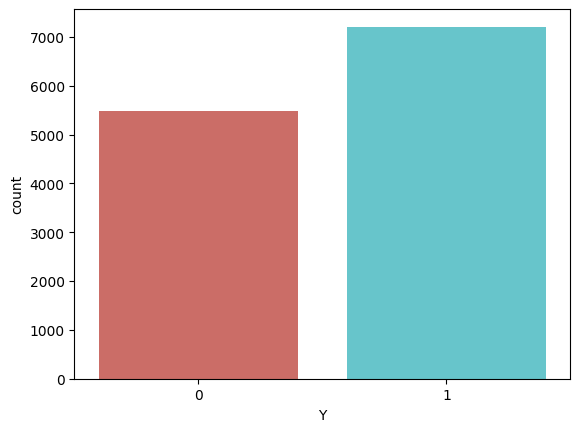

In [53]:
# Balance of the dataset
data['Y'].value_counts()

# graph
sns.countplot(x='Y', data=data, palette='hls')

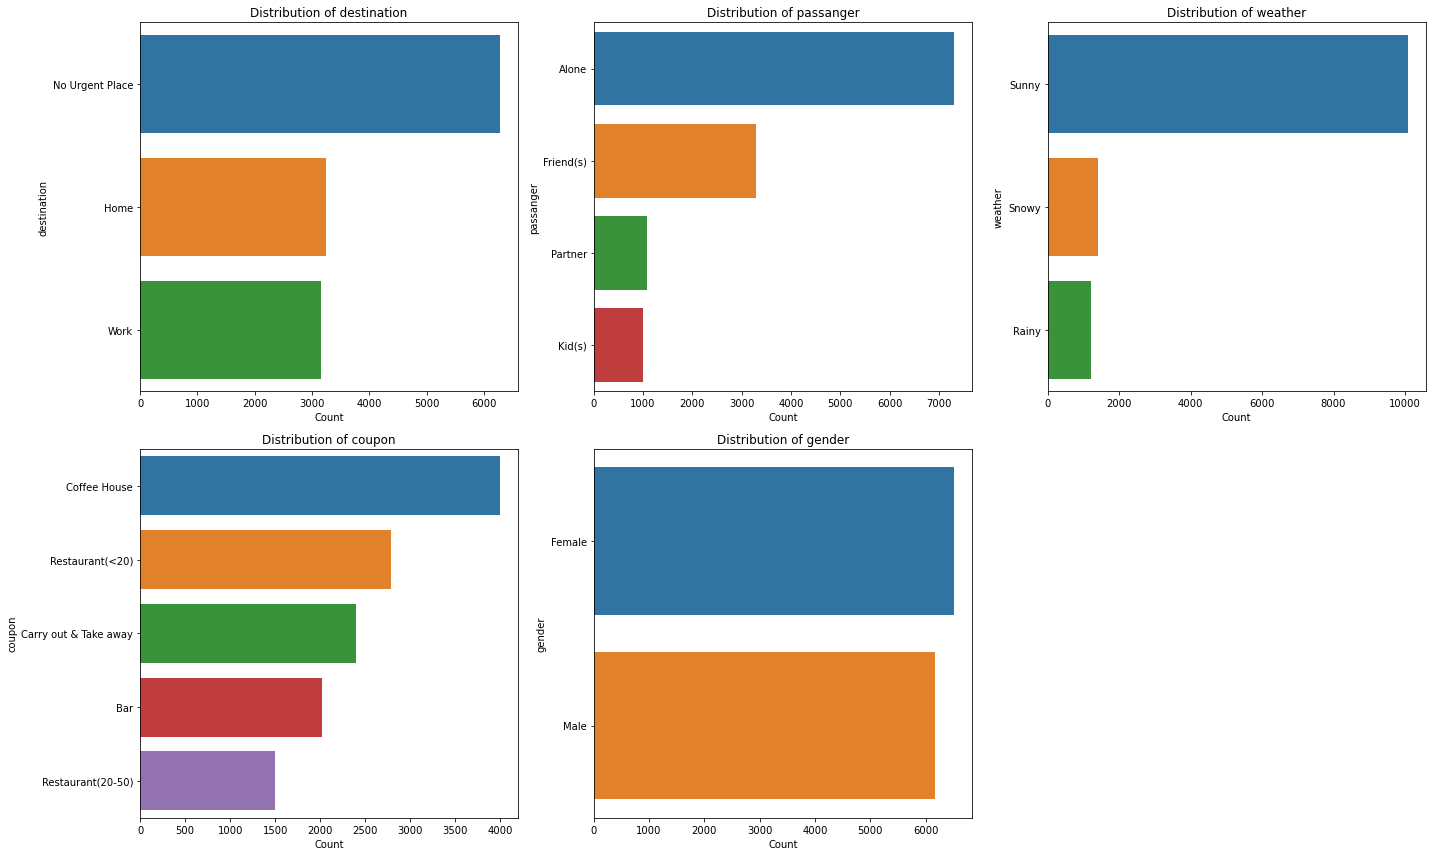

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize
columns_to_visualize = ['destination', 'passanger', 'weather', 'coupon', 'gender']

plt.figure(figsize=(20, 12))

# Plotting the distribution of the selected columns
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, y=column, order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.tight_layout()

plt.show()


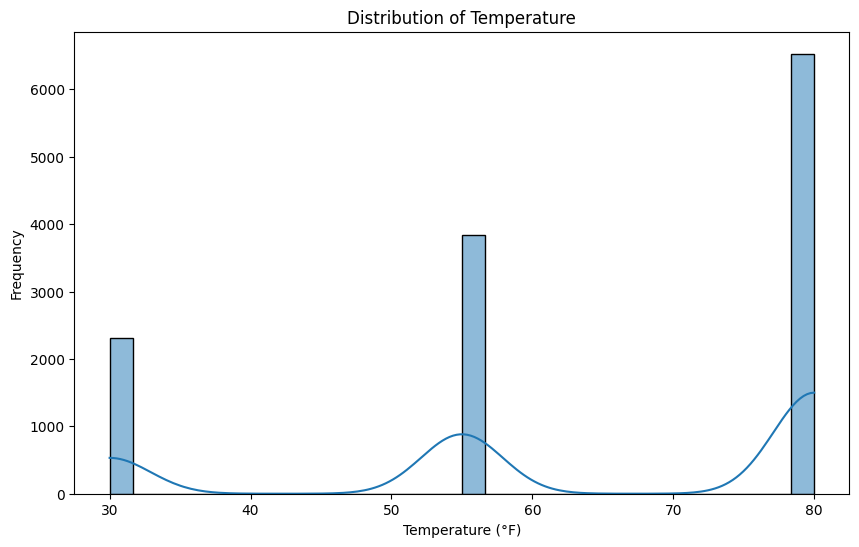

In [55]:
# Visualize the distribution of the 'temperature' column
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], kde=True, bins=30)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

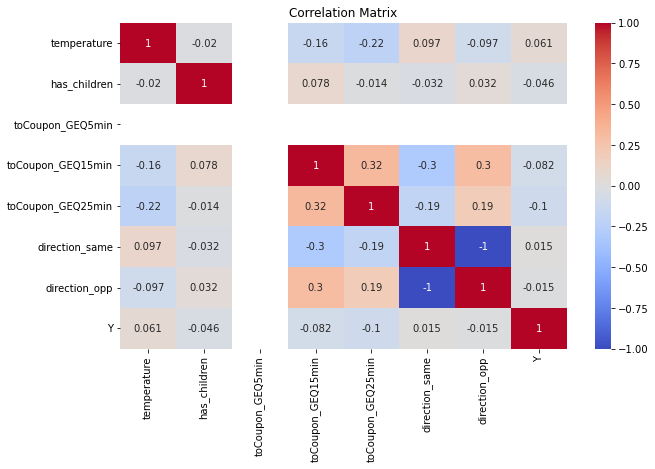

In [94]:
# List of numerical columns for correlation analysis

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Case 1: Imputation with the highest count

In [12]:
number_nans_car = data['car'].isna().sum()
number_nans_car/len(data['car'])

0.9914853358561968

As it is clear, the column 'car' has too many missing values, 99%, so we drop this column

In [15]:
data = data.drop('car', axis=1)

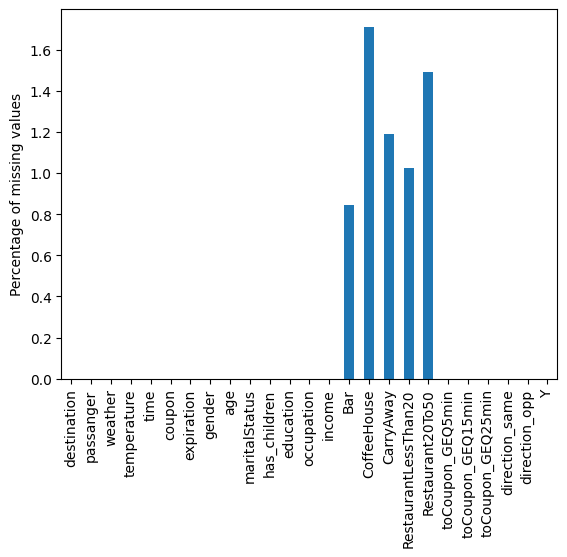

In [16]:
# calculate percentage of missing values for each column
missing_percentages = data.isna().mean() * 100

# create bar plot
missing_percentages.plot(kind='bar')
plt.ylabel('Percentage of missing values')
plt.show()

As can be observed, the percentage of missing values is relatively small, below 1.7%, so we can either drop the rows with missing values or impute them with the most frequent value. We will impute them with the most frequent value.

In [19]:
data = data.fillna(data.mode().iloc[0])

Let us now observe the importance of each feature from the data

In [20]:
X = data.drop("Y", axis=1)
y = data["Y"]

In [22]:
categorical_cols = X.select_dtypes(include=['object']).columns

categorical_cols

Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')

# Chi-Squared test to check for signicance association of each feature

In [23]:
from scipy.stats import chi2_contingency

# Dictionary to store p-values for each categorical column
p_values = {}

for col in categorical_cols:
    contingency_table = pd.crosstab(X[col], y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values[col] = p

# Filter columns with p-value less than 0.05 (indicating statistical significance)
significant_features = {k: v for k, v in p_values.items() if v < 0.05}

significant_features

{'destination': 8.40265678045787e-48,
 'passanger': 7.284119805592145e-48,
 'weather': 8.312207740720093e-31,
 'time': 8.37562170116935e-37,
 'coupon': 8.575341747082738e-188,
 'expiration': 2.2875426931245946e-48,
 'gender': 8.05552865589407e-07,
 'age': 3.5221422366296096e-11,
 'maritalStatus': 6.489647983232487e-10,
 'education': 6.858463266342188e-08,
 'occupation': 1.0136827151270322e-14,
 'income': 4.30446851198096e-08,
 'Bar': 3.133234600310471e-16,
 'CoffeeHouse': 4.171544970829023e-59,
 'CarryAway': 6.808987792859354e-09,
 'RestaurantLessThan20': 0.00010979372427199479,
 'Restaurant20To50': 9.005798285828938e-14}

Note that all p-values are smaller than 0.5, so we can conclude that all features are important for the model.

# Outliers e Fit distr.

### Outliers - Categorical


Text(0.5, 1.0, 'Frequency of Age')

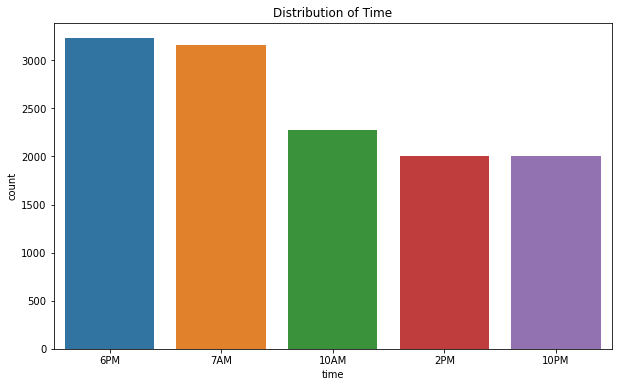

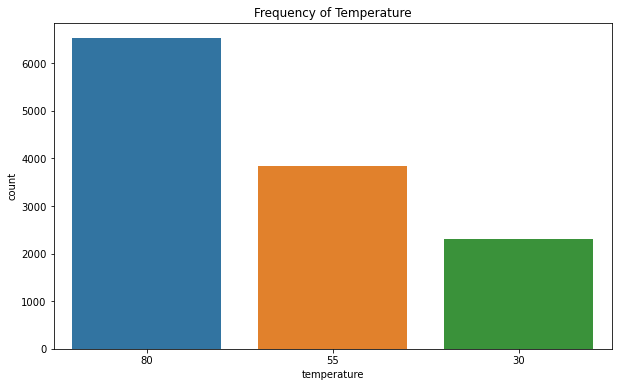

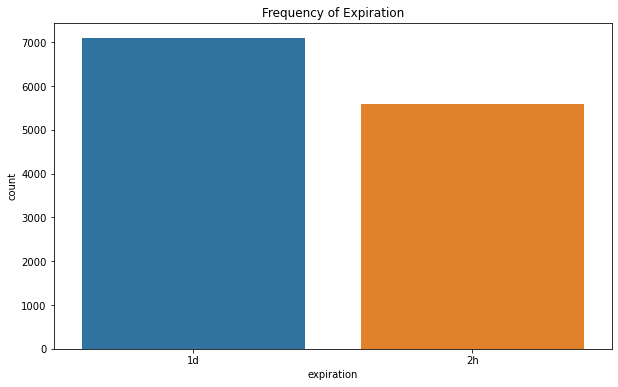

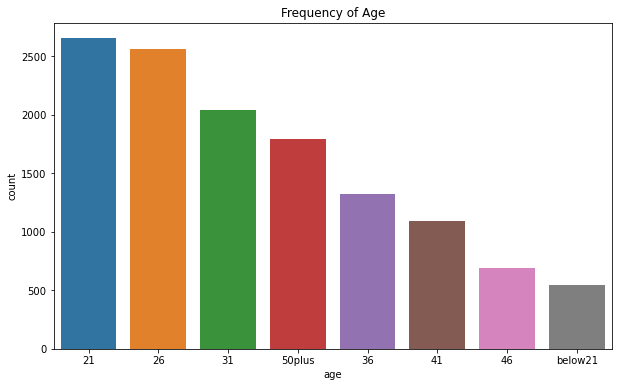

In [57]:
# Diferent categories in time column
data['time'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='time', order=data['time'].value_counts().index)
plt.title('Distribution of Time')

# Frequency of temperature
data['temperature'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='temperature', order=data['temperature'].value_counts().index)
plt.title('Frequency of Temperature')

# Same for expiration
data['expiration'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='expiration', order=data['expiration'].value_counts().index)
plt.title('Frequency of Expiration')

# Same for age
data['age'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age', order=data['age'].value_counts().index)
plt.title('Frequency of Age')

In [58]:
# Data types of the columns
data.dtypes


destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

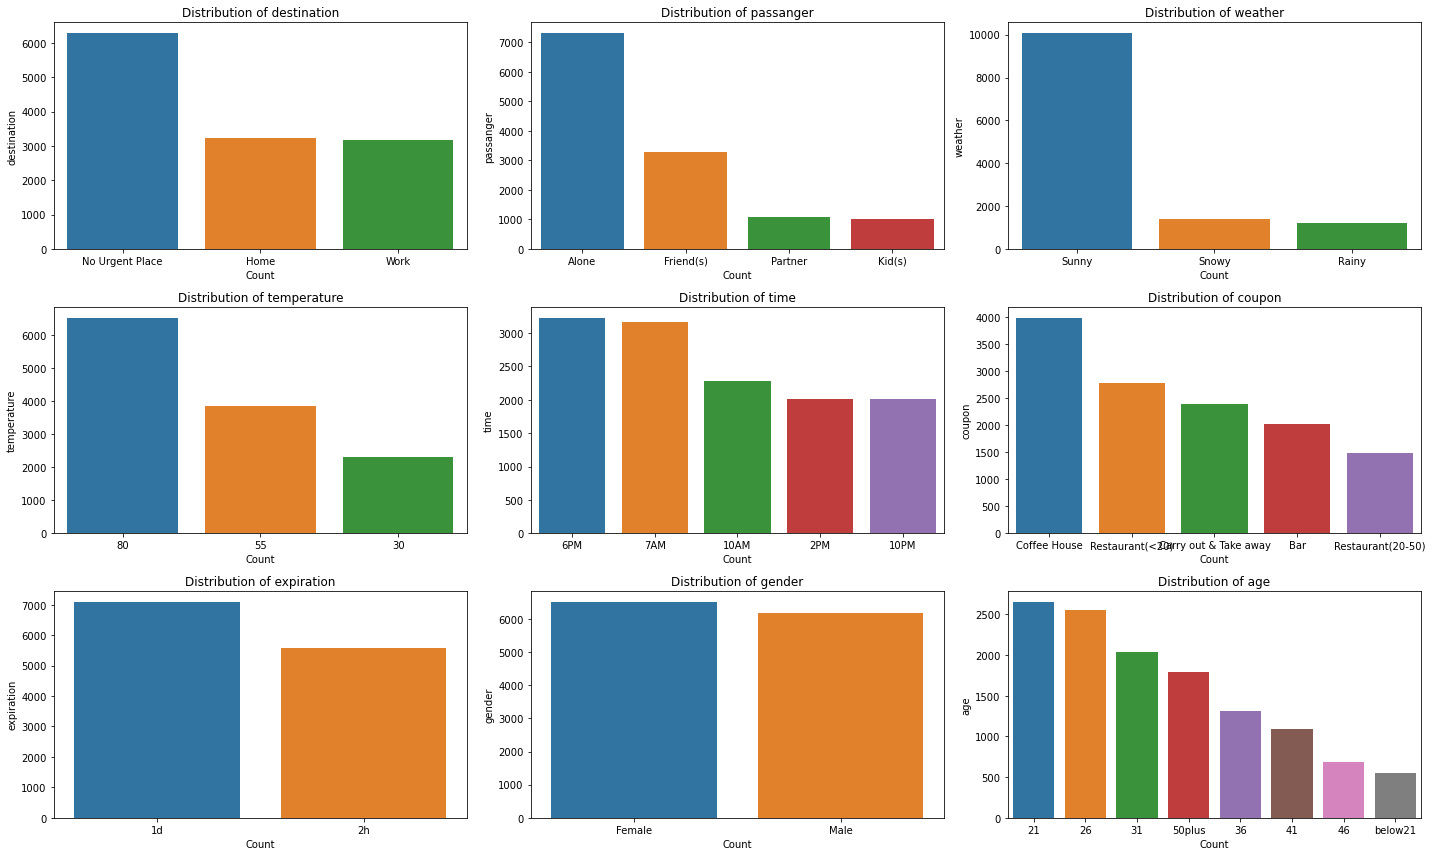

In [59]:
# Frequency and plots for all columns. Plots in one image
plt.figure(figsize=(20, 12))

# Plotting the distribution of the selected columns
for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=column, order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    # layout bigger on y axis
    plt.tight_layout()
    if i == 9:
        break

plt.show()

In [60]:
# frequency of occupation
data['occupation'].value_counts()


Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [61]:
# Frequency analysis for each categorical variable
potential_outliers = {}

for column in data.columns:
    # Count the occurrences of each category in the column
    value_counts = data[column].value_counts(normalize=True)
    
    # Consider categories with less than a certain threshold (e.g., 1% for this example) as potential outliers
    outliers = value_counts[value_counts < 0.02].index.tolist()
    
    if outliers:
        potential_outliers[column] = outliers

potential_outliers

{'maritalStatus': ['Widowed'],
 'education': ['Some High School'],
 'occupation': ['Healthcare Practitioners & Technical',
  'Healthcare Support',
  'Community & Social Services',
  'Legal',
  'Transportation & Material Moving',
  'Architecture & Engineering',
  'Personal Care & Service',
  'Protective Service',
  'Life Physical Social Science',
  'Construction & Extraction',
  'Installation Maintenance & Repair',
  'Production Occupations',
  'Building & Grounds Cleaning & Maintenance',
  'Farming Fishing & Forestry'],
 'CarryAway': ['never'],
 'RestaurantLessThan20': ['never']}

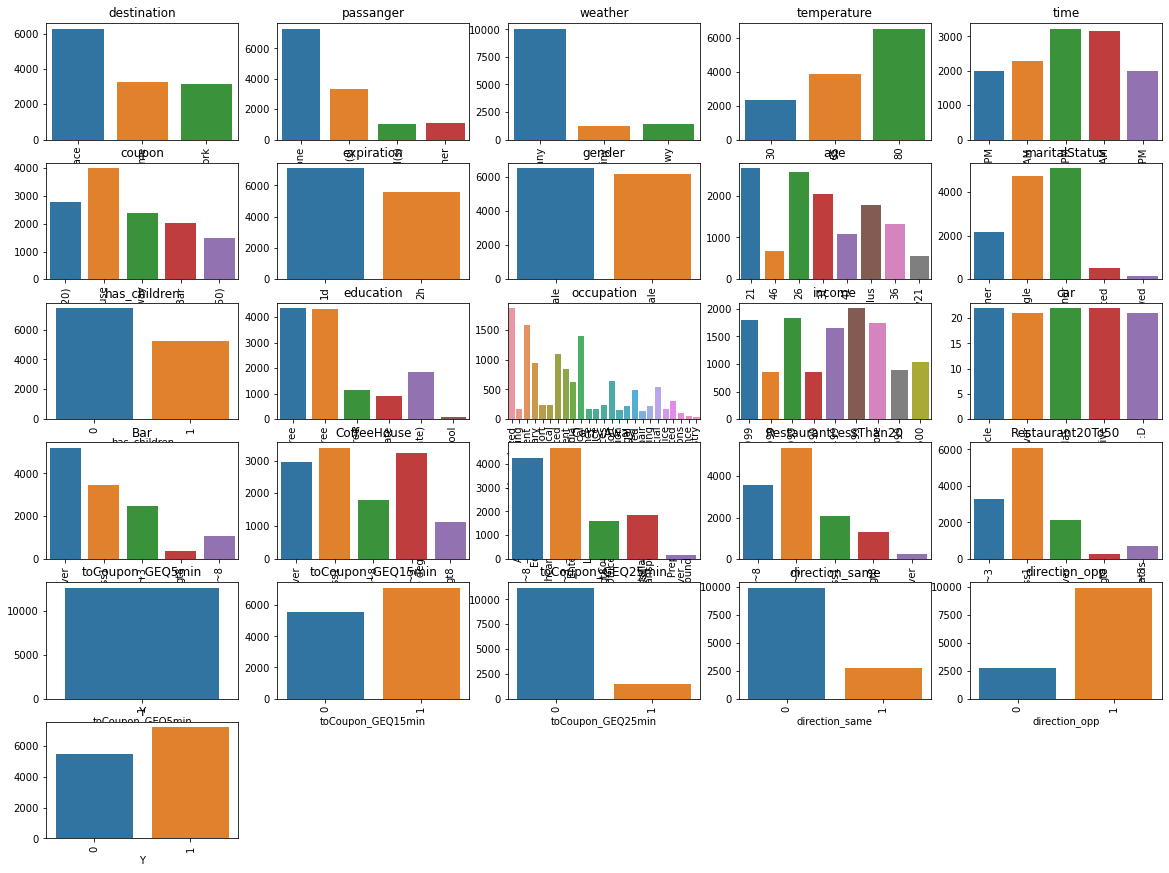

In [62]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Bar Plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(6, 5, i)
    sns.countplot(data[column])
    plt.xticks(rotation=90)
    plt.ylabel("")
    plt.title(column)

plt.tight_layout()
plt.show()

In [63]:
# One class svm

from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

# One-hot encode the data
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(data)

# One-Class SVM
oc_svm = OneClassSVM(nu=0.05, kernel="rbf")
oc_svm_labels = oc_svm.fit_predict(data_encoded)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
iso_forest_labels = iso_forest.fit_predict(data_encoded)

# Convert labels from (-1,1) to (0,1) for consistency
oc_svm_labels = (oc_svm_labels + 1) // 2
iso_forest_labels = (iso_forest_labels + 1) // 2

oc_svm_labels, iso_forest_labels

# count outliers for each model
oc_svm_outliers = sum(oc_svm_labels == 0)
iso_forest_outliers = sum(iso_forest_labels == 0)

oc_svm_outliers, iso_forest_outliers

(639, 635)

In [64]:
import matplotlib.pyplot as plt

# Plotting the results of One-Class SVM with values within 

### K-modes

In [65]:
# import data
data2 = pd.read_csv('in-vehicle-coupon-recommendation.csv')

### DBSCAN

### Balance


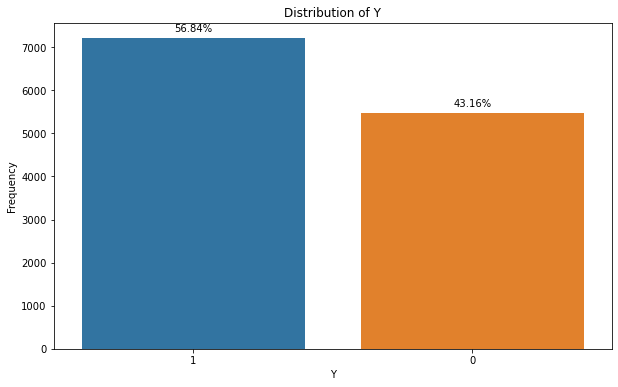

In [93]:
# Specify the order for countplot based on the index of percentage (which comes from value_counts)
order = percentage.index

# Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=data['Y'], order=order)
plt.title('Distribution of Y')
plt.xlabel('Y')
plt.ylabel('Frequency')

# Add percentage text on top of each bar
for p, value in zip(ax.patches, percentage):
    ax.annotate(f'{value:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()




### Cramers correlation

In [100]:
import numpy as np
from scipy.stats import chi2_contingency

# load data
data_correlation = pd.read_csv('in-vehicle-coupon-recommendation.csv')

def cramers_v(x, y):
    """Compute Cramér's V statistic for categorial-categorial association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


# Remove 'car' column as it was previously dropped
data_correlation = data_correlation.drop(columns=['car'])

# Remove toCoupon_GEQ5min column beacuse it all 1
data_correlation = data_correlation.drop(columns=['toCoupon_GEQ5min'])

# Compute the correlation matrix using Cramér's V
corr_matrix = pd.DataFrame(index=data_correlation.columns, columns=data_correlation.columns)

for col1 in data_correlation.columns:
    for col2 in data_correlation.columns:
        corr_matrix.loc[col1, col2] = cramers_v(data_correlation[col1], data_correlation[col2])

corr_matrix = corr_matrix.astype(float)  # Convert to float for heatmap plotting
corr_matrix

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
destination,1.000000,0.538184,0.092017,0.126359,0.844731,0.157157,0.066673,0.000000,0.011630,0.036048,...,0.000000,0.007859,0.000000,0.000000,0.001901,0.144623,0.415533,0.524008,0.524008,0.130136
passanger,0.538184,1.000000,0.113102,0.124965,0.352923,0.116460,0.114370,0.056043,0.095664,0.216204,...,0.059952,0.035032,0.034411,0.039642,0.034320,0.194198,0.279072,0.383820,0.383820,0.131416
weather,0.092017,0.113102,1.000000,0.626247,0.158079,0.154991,0.113787,0.027080,0.029254,0.017158,...,0.016574,0.023724,0.029224,0.027213,0.047383,0.138002,0.232351,0.068531,0.068531,0.103752
temperature,0.126359,0.124965,0.626247,1.000000,0.212646,0.199055,0.124752,0.022550,0.028417,0.036847,...,0.015661,0.017878,0.028529,0.029124,0.046788,0.170760,0.239120,0.141020,0.141020,0.065249
time,0.844731,0.352923,0.158079,0.212646,1.000000,0.146333,0.124393,0.000000,0.005585,0.028904,...,0.000000,0.011638,0.000000,0.006688,0.004921,0.145134,0.392883,0.388690,0.388690,0.116151
coupon,0.157157,0.116460,0.154991,0.199055,0.146333,1.000000,0.236428,0.000000,0.000000,0.020246,...,0.000000,0.000000,0.000000,0.000000,0.010914,0.164317,0.184780,0.138266,0.138266,0.261853
expiration,0.066673,0.114370,0.113787,0.124752,0.124393,0.236428,0.999840,0.000000,0.020323,0.022754,...,0.000000,0.009094,0.000000,0.000000,0.000000,0.041646,0.031506,0.032190,0.032190,0.129461
gender,0.000000,0.056043,0.027080,0.022550,0.000000,0.000000,0.000000,0.999842,0.129787,0.171279,...,0.177336,0.098157,0.057828,0.053666,0.032011,0.000000,0.000000,0.000000,0.000000,0.042902
age,0.011630,0.095664,0.029254,0.028417,0.005585,0.000000,0.020323,0.129787,1.000000,0.273339,...,0.169772,0.127402,0.130332,0.127544,0.136069,0.033877,0.000000,0.034987,0.034987,0.066542
maritalStatus,0.036048,0.216204,0.017158,0.036847,0.028904,0.020246,0.022754,0.171279,0.273339,1.000000,...,0.145824,0.082115,0.063876,0.084759,0.106864,0.049264,0.019030,0.020245,0.020245,0.059420


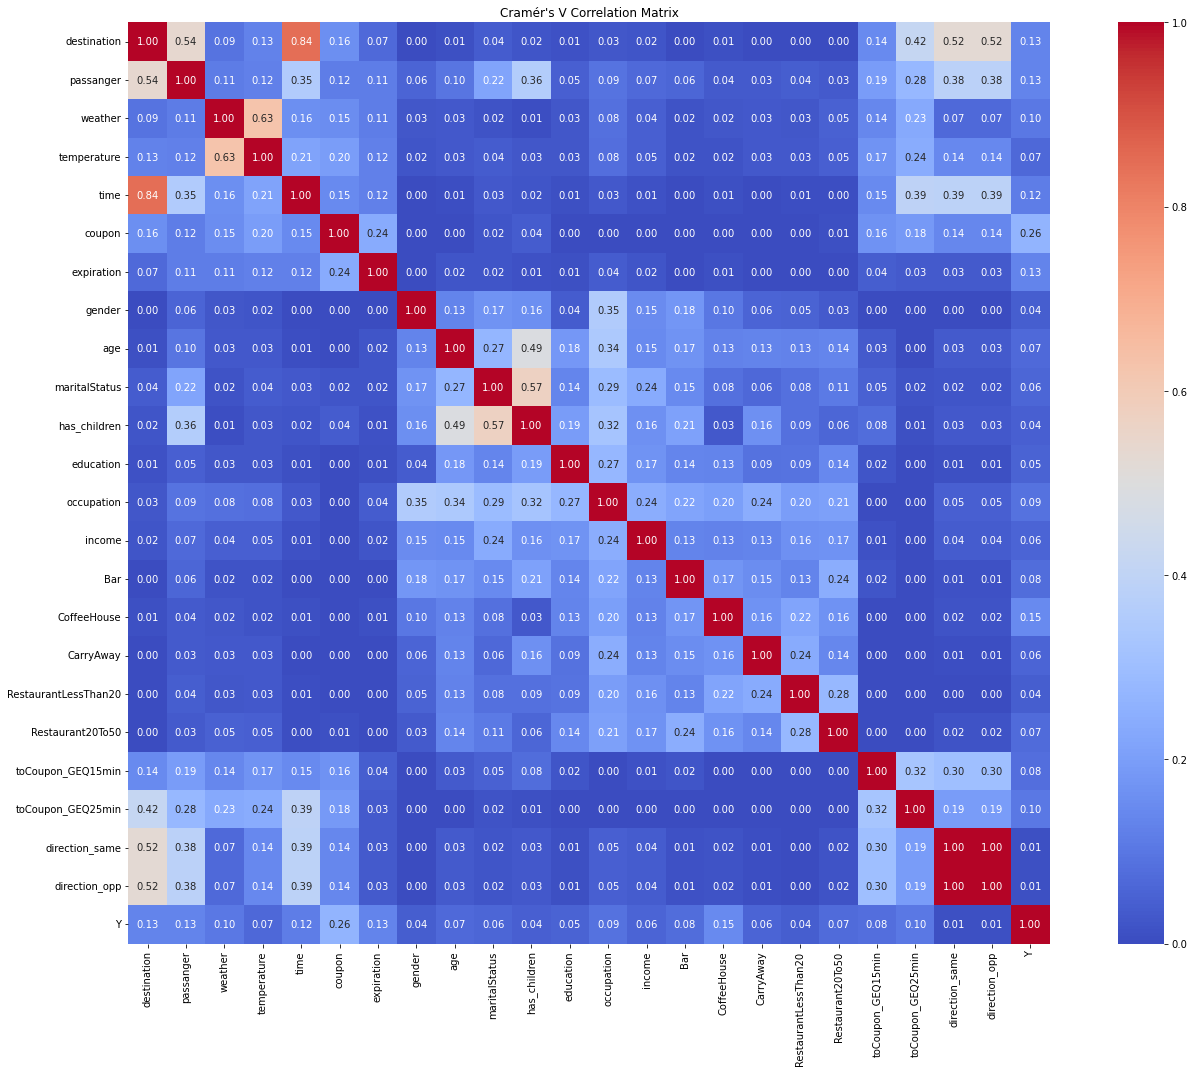

In [101]:
# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Cramér's V Correlation Matrix")
plt.tight_layout()
plt.show()

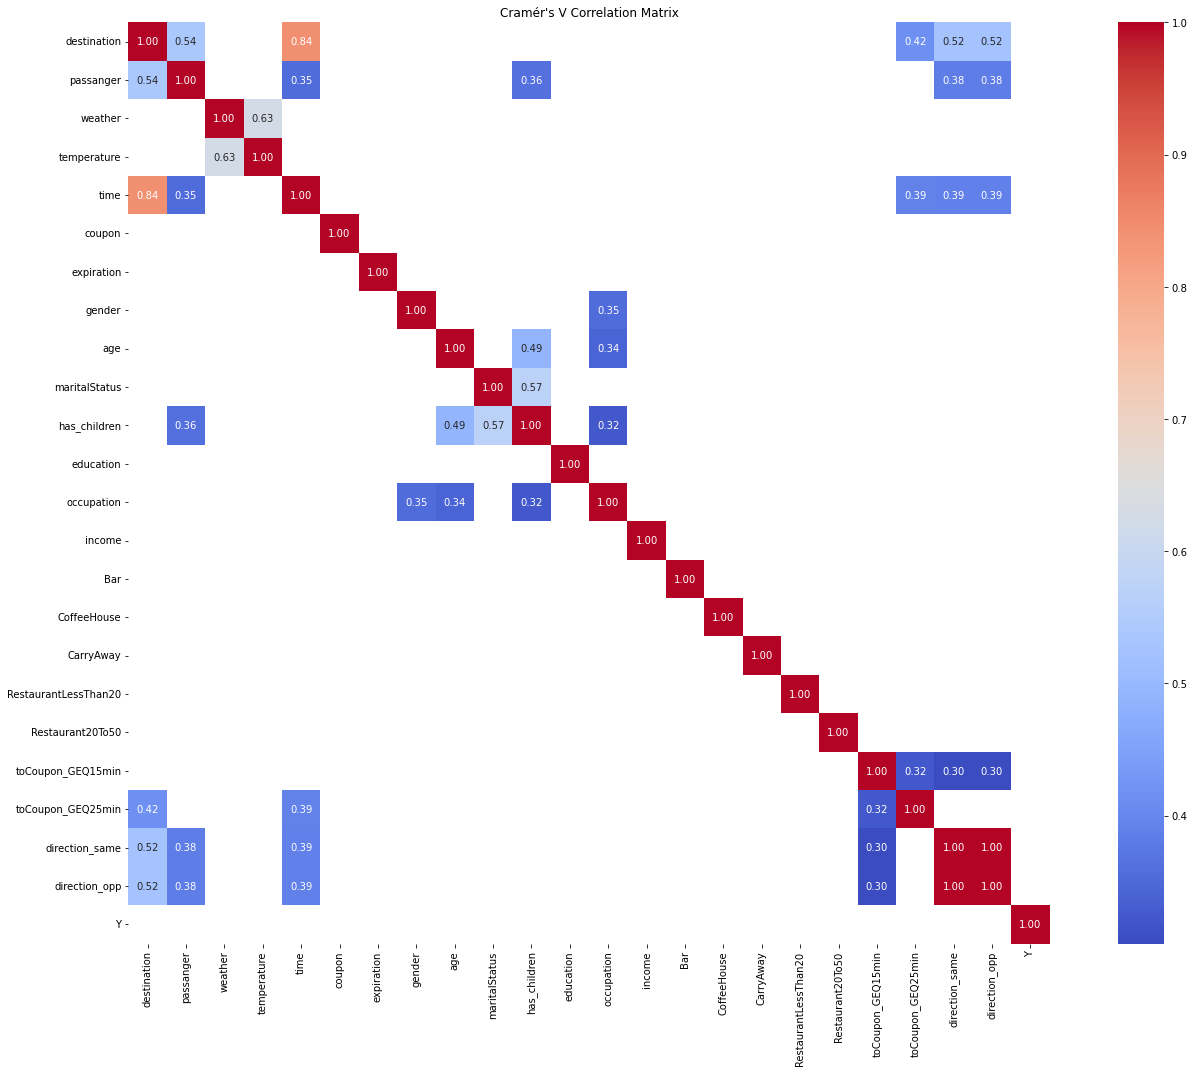

In [103]:
# remove direction_opp column
data_correlation = data_correlation.drop(columns=['direction_opp'])

#Graph with values above 0.3 or bellow -0.3
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix[(corr_matrix >= 0.3) | (corr_matrix <= -0.3)], annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Cramér's V Correlation Matrix")
plt.tight_layout()
plt.show()


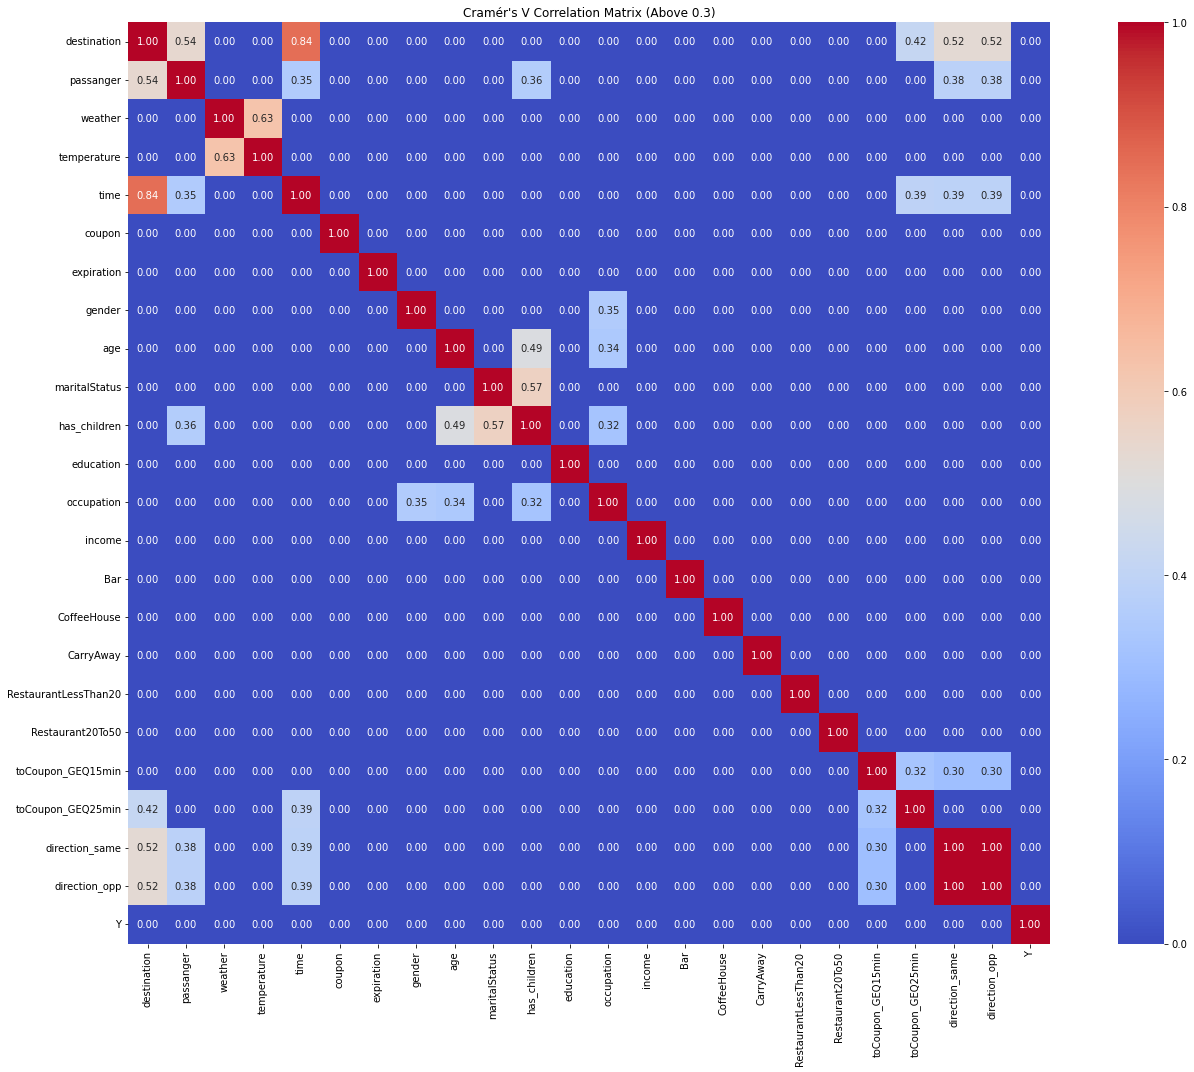

In [104]:
# Filter the correlation matrix to only show values above 0.3
filtered_corr_matrix = corr_matrix[corr_matrix >= 0.3].replace(np.nan, 0)

# Plotting the filtered correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Cramér's V Correlation Matrix (Above 0.3)")
plt.tight_layout()
plt.show()

In [105]:
# Compute the Cramér's V correlation matrix again
corr_matrix = pd.DataFrame(index=data.columns, columns=data.columns)

for col1 in data.columns:
    for col2 in data.columns:
        corr_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

corr_matrix = corr_matrix.astype(float)

# Filter the correlation matrix to only show values above 0.3
strong_associations = corr_matrix[corr_matrix >= 0.3].stack().reset_index()
strong_associations.columns = ['Variable 1', 'Variable 2', 'Cramers V']
strong_associations = strong_associations[strong_associations['Variable 1'] != strong_associations['Variable 2']]  # Exclude self-correlations

strong_associations

,Variable 1,Variable 2,Cramers V
1,destination,passanger,0.538184
2,destination,time,0.844731
3,destination,toCoupon_GEQ25min,0.415533
4,destination,direction_same,0.524008
5,destination,direction_opp,0.524008
6,passanger,destination,0.538184
8,passanger,time,0.352923
9,passanger,has_children,0.361300
10,passanger,direction_same,0.383820
11,passanger,direction_opp,0.383820


In [111]:
# remove direction_opp column from strong associations
strong_associations = strong_associations[strong_associations['Variable 1'] != 'direction_opp']
strong_associations = strong_associations[strong_associations['Variable 2'] != 'direction_opp']

# remove duplicates in Cranmers V
strong_associations = strong_associations.drop_duplicates(subset=['Cramers V'])

# sort values by Cranmers V
strong_associations = strong_associations.sort_values(by=['Cramers V'], ascending=False)

strong_associations



,Variable 1,Variable 2,Cramers V
16,time,destination,0.844731
2,destination,time,0.844731
13,weather,temperature,0.626247
30,maritalStatus,has_children,0.570949
1,destination,passanger,0.538184
4,destination,direction_same,0.524008
32,has_children,age,0.490519
27,age,has_children,0.490519
3,destination,toCoupon_GEQ25min,0.415533
19,time,toCoupon_GEQ25min,0.392883


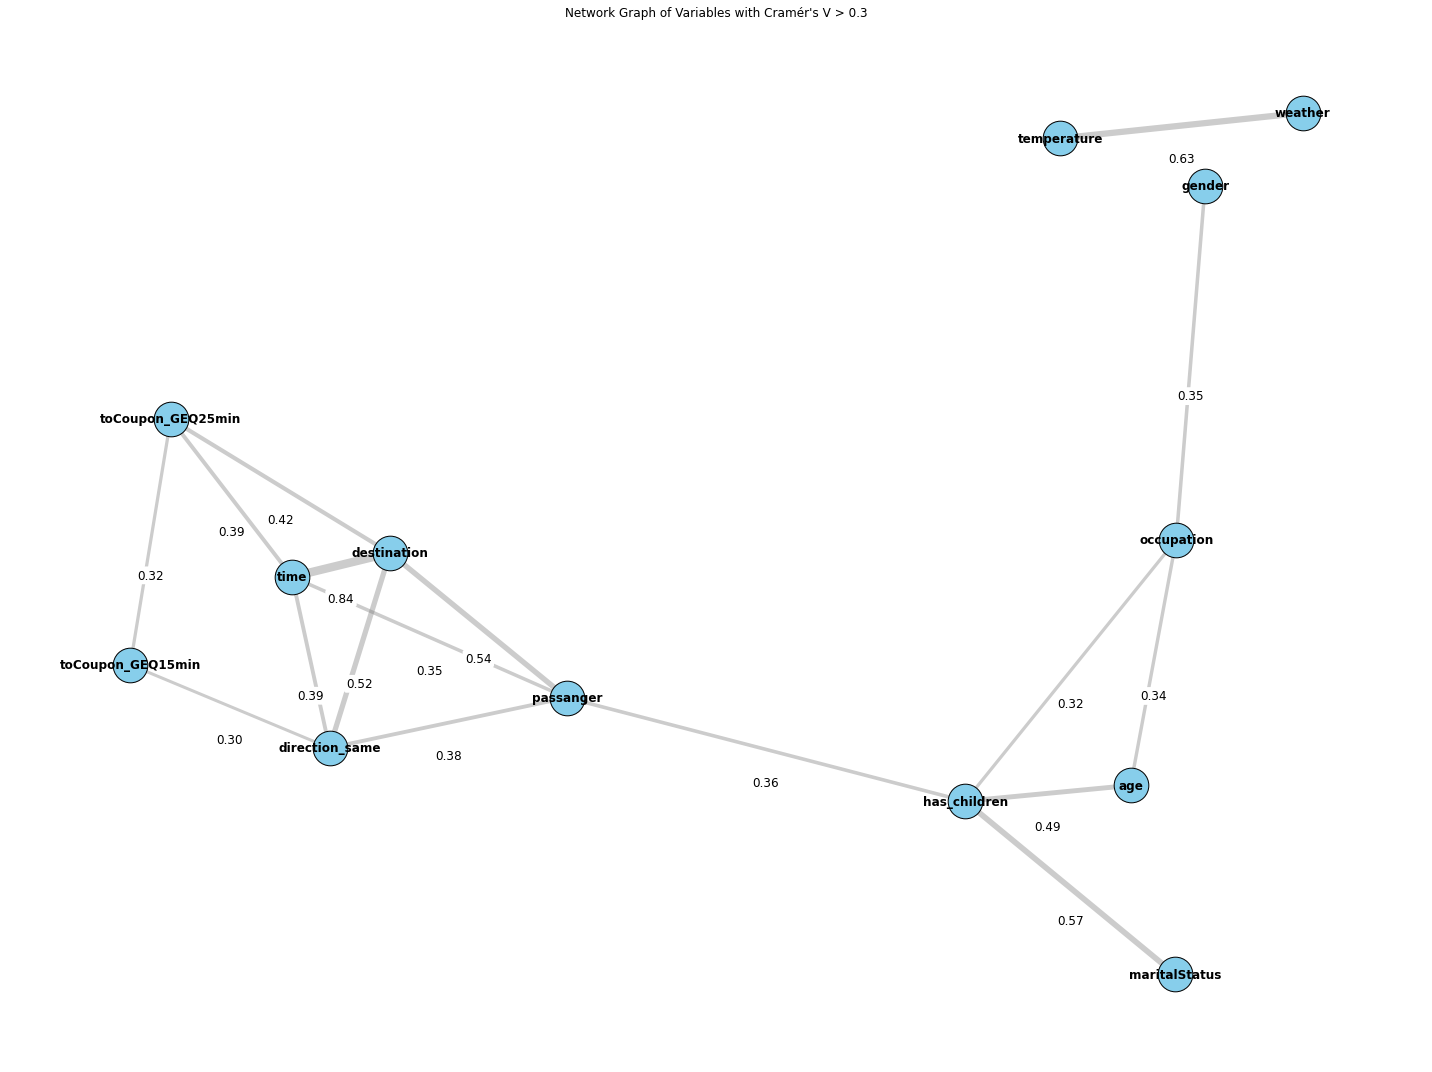

In [194]:
import networkx as nx
import matplotlib.pyplot as plt

# Data
correlation_data = [
    ("time", "destination", 0.844731),
    ("destination", "time", 0.844731),
    ("weather", "temperature", 0.626247),
    ("maritalStatus", "has_children", 0.570949),
    ("destination", "passanger", 0.538184),
    ("destination", "direction_same", 0.524008),
    ("has_children", "age", 0.490519),
    ("age", "has_children", 0.490519),
    ("destination", "toCoupon_GEQ25min", 0.415533),
    ("time", "toCoupon_GEQ25min", 0.392883),
    ("time", "direction_same", 0.388690),
    ("passanger", "direction_same", 0.383820),
    ("passanger", "has_children", 0.361300),
    ("occupation", "gender", 0.354128),
    ("gender", "occupation", 0.354128),
    ("passanger", "time", 0.352923),
    ("age", "occupation", 0.341370),
    ("toCoupon_GEQ15min", "toCoupon_GEQ25min", 0.324630),
    ("has_children", "occupation", 0.322413),
    ("toCoupon_GEQ15min", "direction_same", 0.303222)
]

# Importing necessary libraries and reconstructing the graph
import networkx as nx
import matplotlib.pyplot as plt

# Increasing the optimal distance between nodes for more spacing.
pos = nx.spring_layout(G, k=0.8)  # Adjusting k to 0.8

plt.figure(figsize=(20, 15))
# Drawing nodes with distinct colors
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1200, edgecolors='black')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Drawing edges with adjusted transparency
edges = nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.4, edge_color='gray')

# Adjusting edge label position for better clarity
for (u, v), label in edge_labels.items():
    x = (pos[u][0] + pos[v][0]) / 2
    y = (pos[u][1] + pos[v][1]) / 2 - 0.05  # Adjusting y to shift label down a bit
    plt.text(x, y, f"{label:.2f}", horizontalalignment='center', verticalalignment='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle="round,pad=0.2"))

plt.title("Network Graph of Variables with Cramér's V > 0.3")
plt.axis('off')  # Turn off the axis
plt.tight_layout()
plt.show()


# New


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# load data
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')


In [38]:
# Show index of duplicates
df_duplicate_analisys = df[df.duplicated(keep=False)]

def remove_dup(df: pd.DataFrame):
    # Now remove duplicates
    df = df.drop_duplicates()
    return df


In [39]:
# Value mapping

def value_mapping(df: pd.DataFrame):
    frequency_map = {'never': 0,'less1': 1,'1~3': 2,'4~8': 3,'gt8': 4}
    age_map = {'below21': 0,'21': 1,'26': 2,'31': 3,'36': 4,'41': 5,'46': 6,'50plus': 7}
    income_map = {'Less than $12500': 0,'$12500 - $24999': 1,'$25000 - $37499': 2,'$37500 - $49999': 3,
    '$50000 - $62499': 4,'$62500 - $74999': 5,'$75000 - $87499': 6,'$87500 - $99999': 7,'$100000 or More': 8}
    temperature_map = {30: 0,55: 1,80: 2}

    # CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, Bar
    df['CoffeeHouse'] = df['CoffeeHouse'].map(frequency_map)
    df['CarryAway'] = df['CarryAway'].map(frequency_map)
    df['RestaurantLessThan20'] = df['RestaurantLessThan20'].map(frequency_map)
    df['Restaurant20To50'] = df['Restaurant20To50'].map(frequency_map)
    df['Bar'] = df['Bar'].map(frequency_map)

    #age
    df['age'] = df['age'].map(age_map)

    #income 
    df['income'] = df['income'].map(income_map)

    #temperature
    df['temperature'] = df['temperature'].map(temperature_map)

    return df


In [40]:
# Drop columns

def drop_columns(df: pd.DataFrame):
    df = df.drop(columns=['car'])
    #df = df.drop(columns=['toCoupon_GEQ5min'])
    df = df.drop(columns=['direction_opp'])
    return df

In [41]:
# combine toCoupon_GEQ5min’, toCoupon_GEQ15min’ and ‘toCoupon_GEQ25min’ into one column 0, 1, 2 values

#0: driving distance is less than or equal to 15 min
#1: driving distance is greater than 15 min and less than or equal to 25 min
#2: driving distance is greater than 25 min

def combine_distance_columns(df):
    """
    Combine 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', and 'toCoupon_GEQ25min' 
    columns into a single column 'to_coupon'.
    
    Parameters:
    - df (pd.DataFrame): The input dataframe
    
    Returns:
    - df (pd.DataFrame): The modified dataframe with the 'to_coupon' column
    """
    
    def assign_to_coupon(row):
        if row['toCoupon_GEQ25min'] == 1:
            return 2
        elif row['toCoupon_GEQ15min'] == 1:
            return 1
        else:
            return 0

    # add the new column at penultimate position (before 'Y')
    df.insert(len(df.columns) - 1, 'to_coupon', np.nan)
    df['to_coupon'] = df.apply(assign_to_coupon, axis=1)

    # Drop the original columns
    df.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'], axis=1, inplace=True)
    
    return df


In [42]:
df_test1 = df.copy()

df_test1 = remove_dup(df_test1)
df_test1 = value_mapping(df_test1)
df_test1 = drop_columns(df_test1)
df_test1 = combine_distance_columns(df_test1)